In [0]:
print('Name: Angela Lu; JHU email: alu23@jhu.edu; Github ID: alu23')

Name: Angela Lu; JHU email: alu23@jhu.edu; Github ID: alu23


--2019-09-19 23:41:19--  https://githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv
Resolving githubusercontent.com (githubusercontent.com)... failed: No address associated with hostname.
wget: unable to resolve host address ‘githubusercontent.com’
The estimated probability of failure from a new oring with a temperature of 74 degrees is 0.1


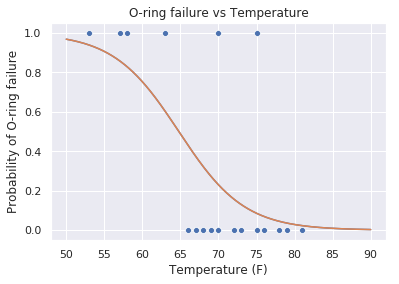

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
## this sets some style parameters
sns.set()

## Download in the data if it's not already there
! if [ ! -e orings.csv ]; \
then wget https://githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv')

total = dat['Total']
temp = dat['Temperature']
ofail = []
temperature = []

for i in range(len(total)):
  if total[i] > 0:
    ofail.append(1)
    temperature.append(temp[i]) #I'm treating a greater than 0 to be a success and appending 1
  else:
    temperature.append(temp[i]) #I'm treating anything 0 to be a failure and appending 0
    ofail.append(0)
    
sns.scatterplot(temperature, ofail)
plt.title('Probability of O-ring failure based on Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel ('Probability of O-ring failure')


temp = dat[['Temperature']]
lr = lm.LogisticRegression(fit_intercept=True, solver = 'lbfgs' , penalty = 'none')
fit = lr.fit(temp, ofail)

beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

n = 1000
xplot = np.linspace(50, 90, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))
sns.lineplot(xplot, p)

yplot = fit.predict_proba(xplot.reshape((n, 1)))
sns.lineplot(xplot, yplot[:, 1])

#d)
xtest = 74
eta = beta0 + beta1 * xtest
predicted_outcome = 1 / (1 + np.exp(-eta))

print('The estimated probability of failure from a new oring with a temperature of 74 degrees is %.1f' %predicted_outcome)

Saving Screen Shot 2019-09-19 at 7.42.31 PM.png to Screen Shot 2019-09-19 at 7.42.31 PM (2).png


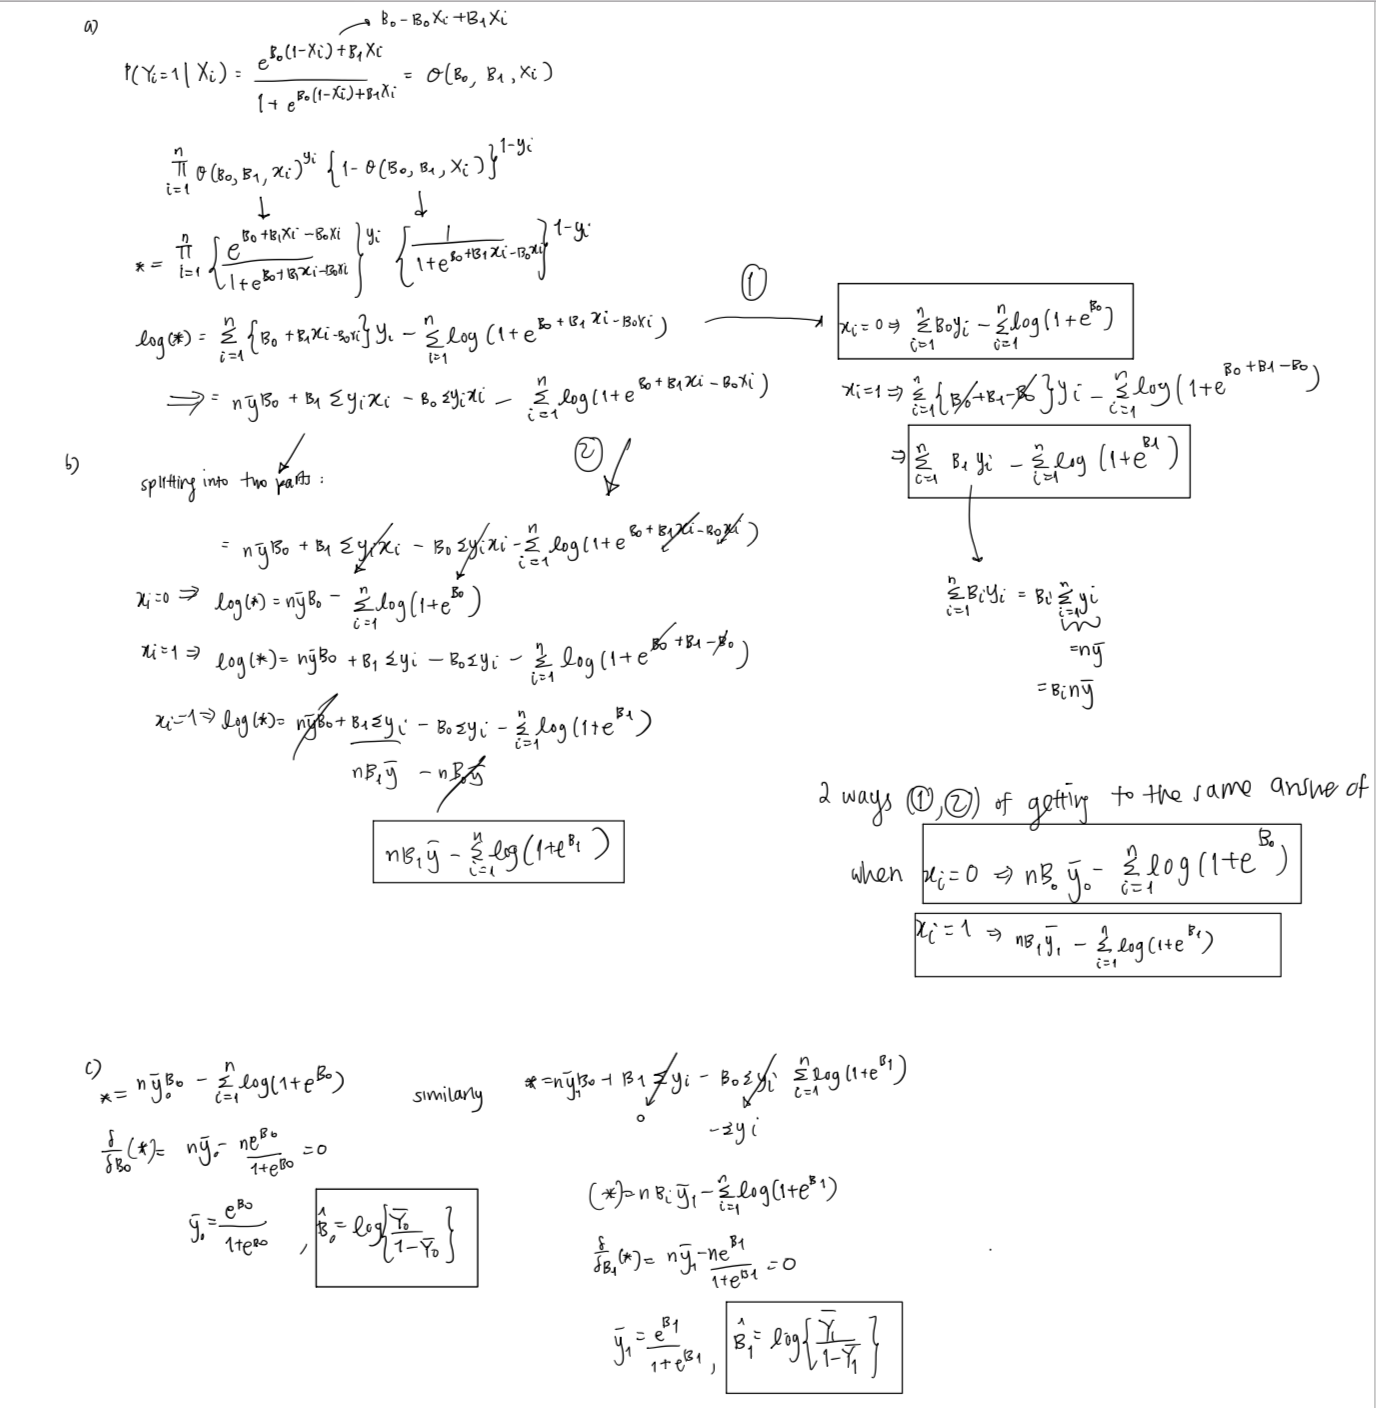

In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()


Image('Screen Shot 2019-09-19 at 7.42.31 PM.png', 
      width = 500)

This is also a link to the image if this is not viewable. Thanks! https://drive.google.com/file/d/1_745ESvGJ1cqcCBtlfRKW0Gu15fa3Ieu/view?usp=sharing

	Data on Infant-Mortality

In [0]:
#Actual link to the data that I'm using
## https://vincentarelbundock.github.io/Rdatasets/datasets.html

## Download in the data if it's not already there
! if [ ! -e Leinhardt.csv ]; \
then wget https://github.com/alu23/ds4bme/blob/master/Leinhardt.csv; \
fi;
 

## Read in the data and display a few rows
dat = pd.read_csv('https://raw.githubusercontent.com/alu23/ds4bme/master/Leinhardt.csv')

dat.head(4)

--2019-09-19 23:50:10--  https://github.com/alu23/ds4bme/blob/master/Leinhardt.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Leinhardt.csv’

Leinhardt.csv           [ <=>                ]  93.78K  --.-KB/s    in 0.07s   

2019-09-19 23:50:10 (1.22 MB/s) - ‘Leinhardt.csv’ saved [96033]



,Unnamed: 0,income,infant,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
